# ToMATo for protein conformation

The goal of this project is to analyze protein conformations using mode-seeking techniques, in
order to detect metastable states and their proximity relations. The difficulty of recovering the
metastable states stems from the fact that the clustering occurs in fairly high dimension (n can be
of ther order of the hundreds or thousands), with data that are not sampled along linear structures
and clusters that are nonconvex. In this project we will use the topology-based method ToMATo
to cluster the conformations.

The [paper](https://hal.inria.fr/inria-00389390/document).

In [90]:
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
from gudhi.clustering.tomato import Tomato
%matplotlib inline

### Collect the data

In [5]:
data = np.loadtxt('data/aladip_implicit.xyz')
data.shape

(14207380, 3)

In [23]:
data[:10]

array([[24.949, 24.689, 25.193],
       [24.881, 24.824, 25.159],
       [24.769, 24.855, 25.208],
       [24.959, 24.901, 25.083],
       [24.917, 25.034, 25.028],
       [24.919, 25.132, 25.141],
       [24.991, 25.083, 24.904],
       [24.974, 25.201, 24.867],
       [25.077, 24.998, 24.83 ],
       [25.143, 25.022, 24.7  ]])

In [25]:
conformations = data.reshape(-1,30)
conformations.shape

(1420738, 30)

### Implement and compute the RMSD distance matrix between the 30-dimensional conformations

In [80]:
def RMSD(u: np.array, w: np.array):
    n = u.shape[0]
    return np.sqrt(1/n * np.sum(np.power(u - w, 2)))

We will only compute RMSD for _size_ of 30-dim conformations

In [123]:
size = 3000

In [124]:
indices = np.random.choice(conformations.shape[0], size=size, replace=False)
subset_conf = conformations[indices]

In [125]:
matr = np.zeros((size,size))

In [126]:
for i in range(indices.shape[0]):
    for j in range(indices.shape[0]):
        matr[i,j] = RMSD(subset_conf[i], subset_conf[j])

### Use MDS to produce an embedding of the data set in 2 dimensions for visualization.

In [127]:
mds = manifold.MDS(
    n_components = 2, 
    max_iter = 3000, 
    eps = 1e-9, 
    dissimilarity = "precomputed", 
    n_jobs = -1
)
pos = mds.fit(matr).embedding_

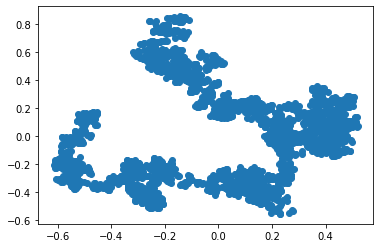

In [128]:
plt.figure()
plt.scatter(pos[:,0], pos[:,1])
plt.show()

### Try applying ToMATo to the computed RMSD distance matrix.

/home/snopoff/miniconda3/envs/tda_workshop/lib/python3.9/site-packages/gudhi/clustering/tomato.py:285: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(


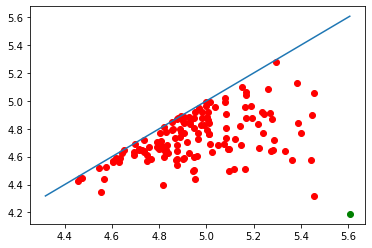

In [129]:
t = Tomato(metric="precomputed")
t.fit(matr)
t.plot_diagram()

In [134]:
#the optimal number is being observed from the diagonal above
t.n_clusters_ = 5

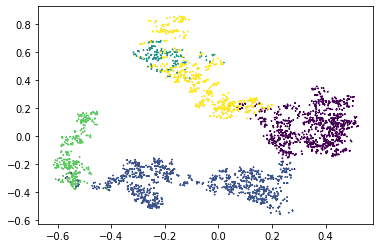

In [133]:
plt.scatter(pos[:,0],pos[:,1],marker='*',s=1,c=t.labels_)
plt.show()